In [5]:

import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:

url = "https://github.com/Tuan3198263/CT294/raw/main/online_shoppers_intention.csv"
df = pd.read_csv(url)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Tổng Quan về dữ liệu

In [ ]:
#12230 dòng
df.shape[0]

12330

In [ ]:
#thong tin datasets
df.info()

Có 2 biến Boolean, 2 biến phân loại và 14 biến số (7 số nguyên và 7 biến số thực) trong tập dữ liệu.


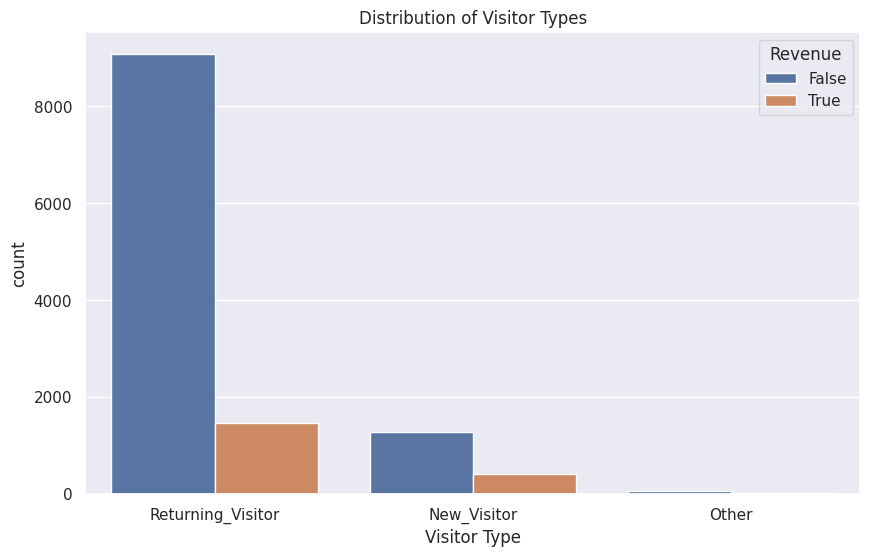

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Sử dụng hàm countplot để vẽ biểu đồ cột
sns.countplot(x='VisitorType', hue='Revenue',data=df)

# Đặt tiêu đề và nhãn trục
plt.title('Distribution of Visitor Types')
plt.xlabel('Visitor Type')


# Hiển thị biểu đồ
plt.xticks(rotation=0)
plt.show()

Khách truy cập quay lại chiếm đa số

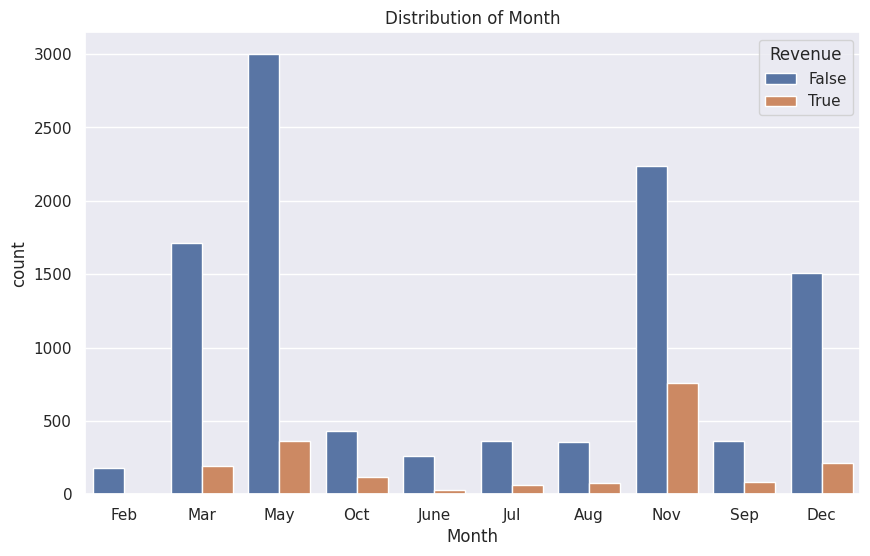

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Sử dụng hàm countplot để vẽ biểu đồ cột
sns.countplot(x='Month', hue='Revenue',data=df)

# Đặt tiêu đề và nhãn trục
plt.title('Distribution of Month')
plt.xlabel('Month')


# Hiển thị biểu đồ
plt.xticks(rotation=0)
plt.show()

Tháng 3, 5, 11, 12 Có lượng truy cập đáng cao hơn các tháng khác, trong đó thang 11 có lưu lượng người mua hàng cao nhất

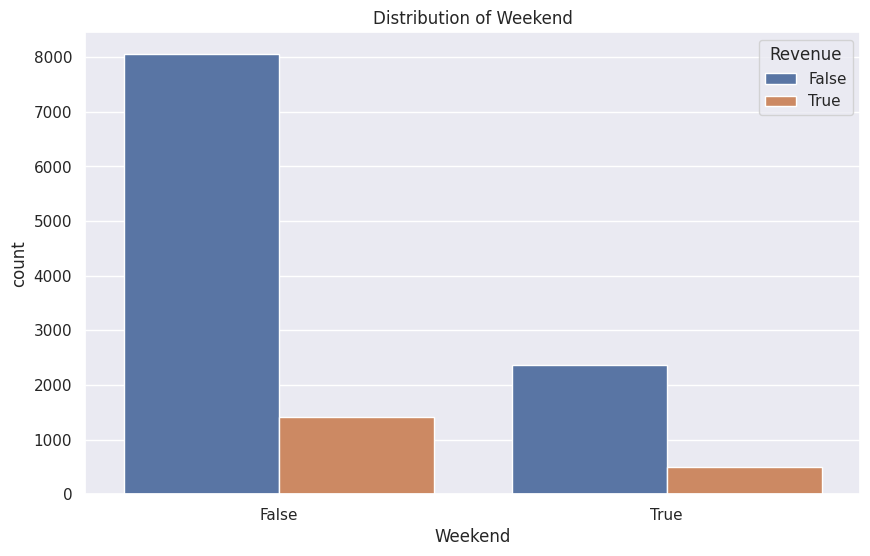

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Sử dụng hàm countplot để vẽ biểu đồ cột
sns.countplot(x='Weekend', hue='Revenue',data=df)

# Đặt tiêu đề và nhãn trục
plt.title('Distribution of Weekend')
plt.xlabel('Weekend')


# Hiển thị biểu đồ
plt.xticks(rotation=0)
plt.show()

Lượng khách truy cập k phải cuối tuần cao hơn đáng kể, tuy nhiên chỉ một số ít trong đó kết thúc bằng việc mua hàng

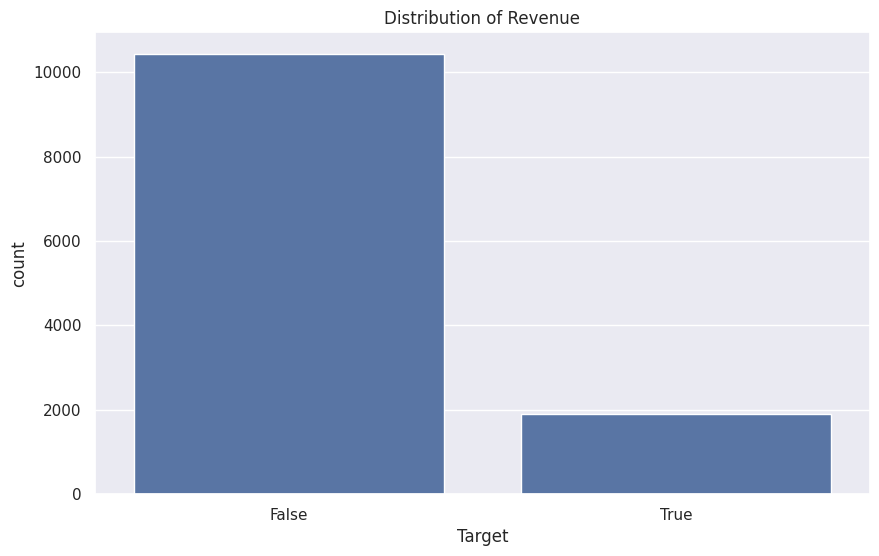

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Sử dụng hàm countplot để vẽ biểu đồ cột
sns.countplot(x='Revenue',data=df)

# Đặt tiêu đề và nhãn trục
plt.title('Distribution of Revenue')
plt.xlabel('Target')


# Hiển thị biểu đồ
plt.xticks(rotation=0)
plt.show()

Datasets bị mất cân bằng. Chỉ có khoảng 15% mua hàng trong khi 85% không thực hiện mua hàng --> Không thể đánh giá bằng Accuracy

In [ ]:
#Kiem tra du lieu bi thieu
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Không có giá trị nào bị thiếu trong tập dữ liệu

In [ ]:
#mo ta bo du lieu
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Trung bình người dùng truy cập 2 trang Quản trị và 31 Trang liên quan đến sản phẩm. Tuy nhiên, có rất ít hoặc không có sự tương tác với các trang Thông tin.

***Mã Hóa dữ liệu***

In [ ]:
df['Month'].value_counts()

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

In [25]:
#ma hoa cot Month
month_mapping = {'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Thực hiện mã hóa cột "Month" bằng cách thay thế giá trị trong từ điển
df['Month'] = df['Month'].replace(month_mapping)

In [26]:
df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [27]:
#mã hóa cột VisitorType
df['VisitorType'] = df['VisitorType'].replace({'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2})

In [28]:
df['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

In [29]:
# Chuyển đổi 'TRUE' thành 1 và 'FALSE' thành 0
df['Weekend'] = df['Weekend'].astype(int)

In [30]:
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [ ]:
#Chuyển đổi cột nhãn
#df['Revenue'] = df['Revenue'].astype(int)

In [31]:
#
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,False


# **Chuẩn hóa dữ liệu**

In [33]:
# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Tạo một DataFrame chỉ chứa các cột đặc trưng (loại bỏ cột nhãn)
df_features = df.drop(columns=['Revenue'])

# Chuẩn hóa dữ liệu đặc trưng
df_normalized = scaler.fit_transform(df_features)

# Tạo một DataFrame mới từ dữ liệu đã chuẩn hóa và sử dụng cùng các tên cột
df_normalized = pd.DataFrame(df_normalized, columns=df_features.columns)

# Thêm cột nhãn vào DataFrame đã chuẩn hóa
df_normalized['Revenue'] = df['Revenue']



In [ ]:
df_normalized

<Axes: >

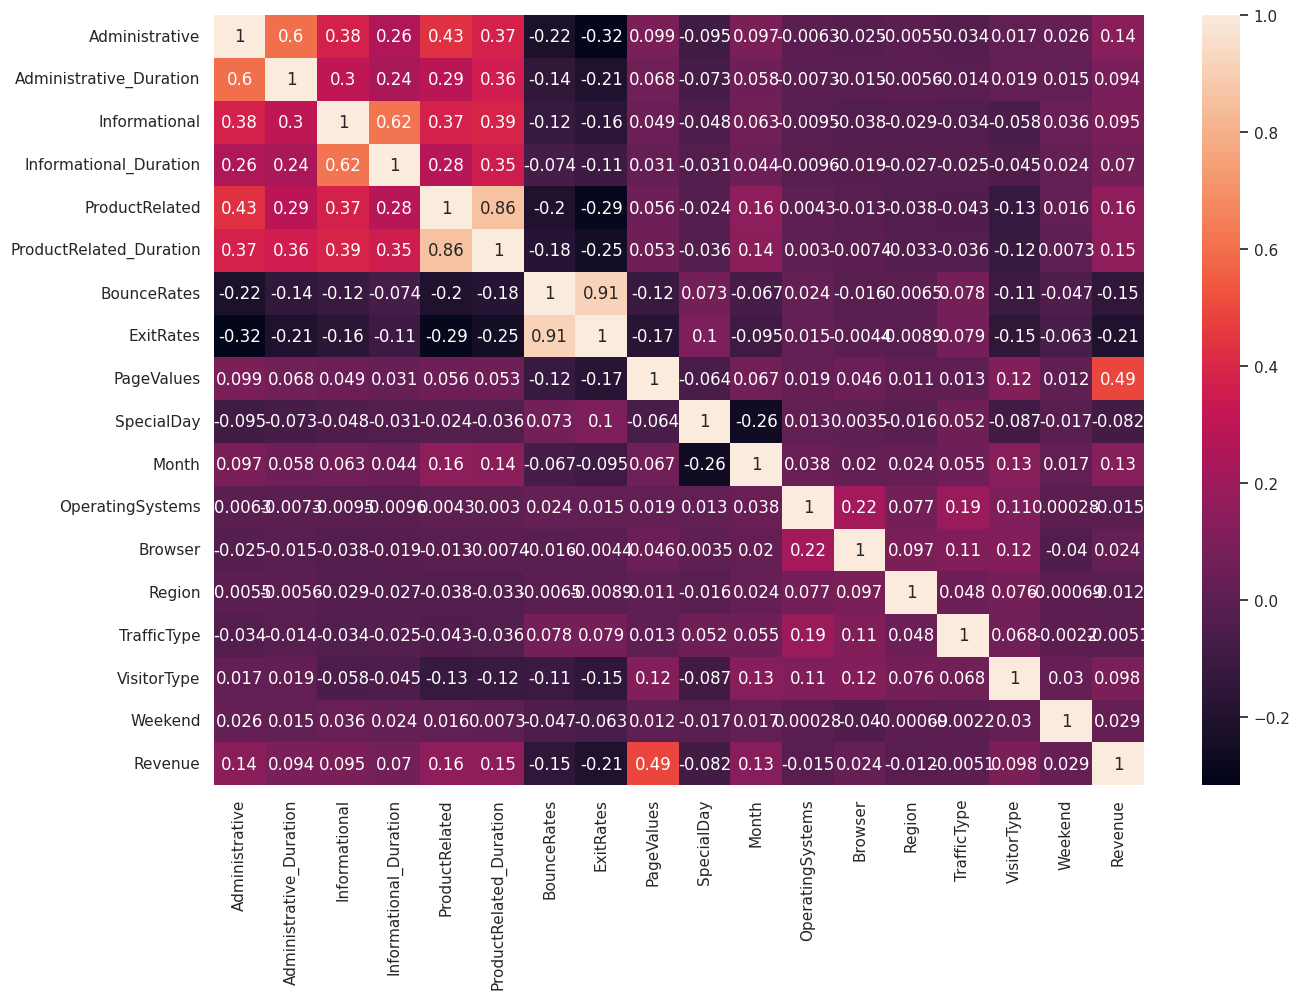

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  float64
 11  OperatingSystems         12330 non-null  float64
 12  Browser                  12330 non-null  float64
 13  Region                   12330 non-null  float64
 14  TrafficType           

In [ ]:
df_normalized['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [ ]:
print(df_normalized['Revenue'].isna().sum())


0


In [ ]:
# Xuất DataFrame đã chuẩn hóa ra file CSV
df_normalized.to_csv('online_shoppers_intention_scale.csv', index=False)